<a href="https://colab.research.google.com/github/Codinggenttleman/202010/blob/main/drink.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#=======================================================4

# step 1 탐색

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

drinks = pd.read_csv("drinks.csv") # 기본적으로 데이터 프레임 형으로 가져온다
print(drinks.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     170 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB
None


In [ ]:
drinks.head(10)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,NaN
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


In [ ]:
drinks.describe()


,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


In [ ]:
#==========================================================

# step 2 인사이트의 발견

In [ ]:
# 피처간의 상관관계 탐색 (예:키와 몸무게의 관계...)

# 두개 피처의 상관계수 구하기 
# beer_servings	 wine_servings 의 상관계수를 구해보자
# pearson은 상관계수를 구하는 계산 방법 중 하나이며 가장 널리 쓰이는 방법이다. 

corr = drinks[['beer_servings', 'wine_servings']].corr(method = 'pearson')
print(corr)



               beer_servings  wine_servings
beer_servings       1.000000       0.527172
wine_servings       0.527172       1.000000


In [ ]:
# 상관 분석

# 상관 분석이란 두 변수 간의 선형적 관계를 상관계수로 표현하는 것이다. 
# 상관 계수를 구한다는 것은 공분산의 개념을 포함한다. 
# 공분산은 2개의 확률 변수에 대한 상관 정도로 2개의 변수 중 하나의 값이 상승하는 경향을 보일 때
# 다른 값도 상승하는 경향을 수치로 나타낸 것이다. 
# 공분산만으로 두 확률 변수의 상관 관계를 구하게 되면 두변수의 단위 크기에 따라 영향을 받을수 밖에 없다. 
# 따라서, -1에서 1사의 값으로 바꾸어 표현 표현한 것을 상관 계수하고 한다. 


# -1에 가까운 값이 얻어지면 : 누가 봐도 매우 강력한 음(-)의 상관. 오히려 너무 확고하기 때문에 사회과학 데이터일 경우 데이터를 조작한 게 아닌가 의심할 정도이다. 물론 이건 사회과학 얘기고 순수학문에 가까운 분야일수록 요구되는 상관관계는 높은 편.
# -0.5 정도의 값이 얻어지면 : 강력한 음(-)의 상관. 연구자는 변인 x 가 증가하면 변인 y 가 감소한다고 자신 있게 말할 수 있다.
# -0.2 정도의 값이 얻어지면 : 음(-)의 상관이긴 한데 너무 약해서 모호하다. 상관관계가 없다고는 할 수 없지만 좀 더 의심해 봐야 한다.
# 0 정도의 값이 얻어지면 : 대부분의 경우, 상관관계가 있을거라고 간주되지 않는다. 다른 후속 연구들을 통해 뒤집어질지는 모르지만 일단은 회의적이다. 하지만 무조건적으로 그런건 아니라 2차 방정식 그래프와 비슷한 모양이 될 경우 상관관계는 있으나 상관계수는 0에 가깝게 나온다.
# 0.2 정도의 값이 얻어지면 : 너무 약해서 의심스러운 양(+)의 상관. 이것만으로는 상관관계에 대해 아주 장담할 수는 없다. 하지만 사회과학에선 매우 큰 상관관계가 있는 것으로 간주한다.
# 0.5 정도의 값이 얻어지면 : 강력한 양(+)의 상관. 변인 x 가 증가하면 변인 y 가 증가한다는 주장은 이제 통계적으로 지지받고 있다.
# 1에 가까운 값이 얻어지면 : 이상할 정도로 강력한 양(+)의 상관. 위와 마찬가지로, 이렇게까지 확고한 상관관계는 오히려 쉽게 찾아보기 어렵다.

In [ ]:
cols = ['beer_servings', 'spirit_servings','wine_servings','total_litres_of_pure_alcohol']
corr = drinks[cols].corr(method = 'pearson')
print(corr)

                              beer_servings  ...  total_litres_of_pure_alcohol
beer_servings                      1.000000  ...                      0.835839
spirit_servings                    0.458819  ...                      0.654968
wine_servings                      0.527172  ...                      0.667598
total_litres_of_pure_alcohol       0.835839  ...                      1.000000

[4 rows x 4 columns]


In [ ]:
pip install seaborn   # 시각화 라이브러리

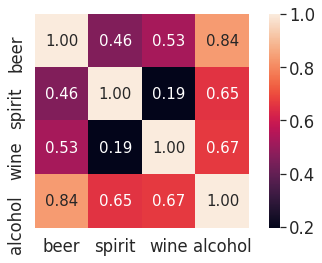

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


cols_view = ['beer', 'spirit', 'wine', 'alcohol'] # 그래프 출력을 위한 cols 이름을 축약합니다.
sns.set(font_scale=1.5)
hm = sns.heatmap(corr.values,
            cbar=True,
            annot=True, 
            square=True,
            fmt='.2f',
            annot_kws={'size': 15},
            yticklabels=cols_view,
            xticklabels=cols_view)

plt.tight_layout()
plt.show()

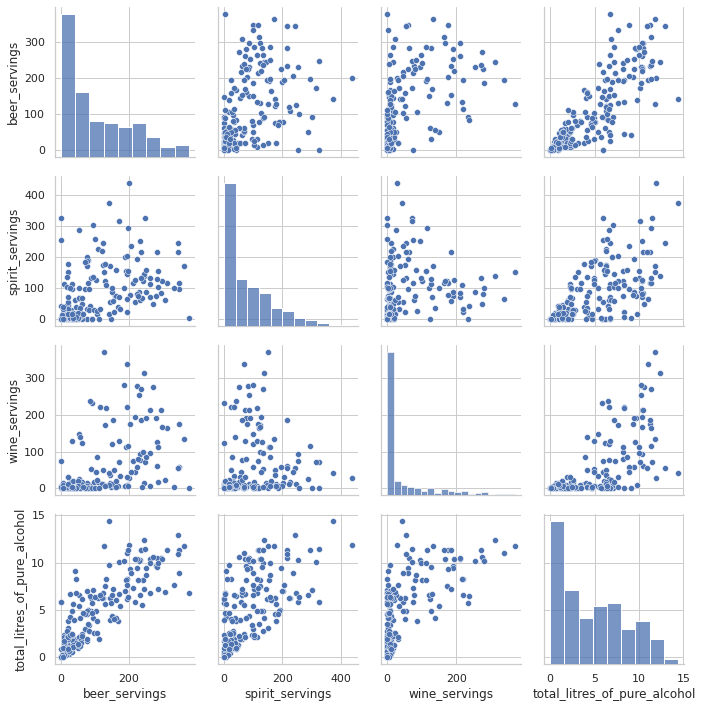

In [ ]:
sns.set(style='whitegrid', context='notebook')
sns.pairplot(drinks[['beer_servings','spirit_servings','wine_servings','total_litres_of_pure_alcohol']], height = 2.5)
plt.show()

In [ ]:
#=======================================================

# step 3 전처리

In [ ]:
# 결측 데이터 처리

print(drinks.isnull().sum())

print(drinks.dtypes)

country                          0
beer_servings                    0
spirit_servings                  0
wine_servings                    0
total_litres_of_pure_alcohol     0
continent                       23
dtype: int64
country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object


In [ ]:
# 결측 데이터 처리, 기타 대륙으로 통합 -> 'OT'

drinks['continent'] = drinks['continent'].fillna('OT')

In [ ]:
drinks.head(10)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,OT
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


In [ ]:
print(drinks.isnull().sum())

country                         0
beer_servings                   0
spirit_servings                 0
wine_servings                   0
total_litres_of_pure_alcohol    0
continent                       0
dtype: int64


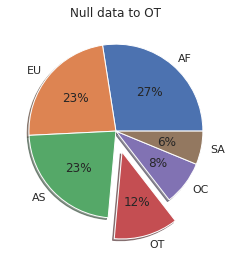

In [ ]:
labels = drinks['continent'].value_counts().index.tolist()
fracs1 = drinks['continent'].value_counts().values.tolist()
explode = (0,0,0,0.25,0,0)

plt.pie(fracs1, explode=explode, labels=labels, autopct='%.0f%%',shadow = True)
plt.title('Null data to OT')
plt.show()

In [ ]:
# 대륙별 spirit_servings의 통계적 정보는

# agg() 함수를 사용하여 그룹 단위로 분석을 한번에 수행한다. 여러가지 연산 결과를 동시에 얻을 수 있는 함수

result = drinks.groupby('continent').spirit_servings.agg(['mean', 'min', 'max', 'sum'])
result.head()

,mean,min,max,sum
continent,,,,
AF,16.339623,0,152,866
AS,60.840909,0,326,2677
EU,132.555556,0,373,5965
OC,58.437500,0,254,935
OT,165.739130,68,438,3812


In [ ]:
# 전체 평균보다 많은 알코올을 섭취하는 대륙은 어디?
total_mean = drinks.total_litres_of_pure_alcohol.mean()
continent_mean = drinks.groupby('continent')['total_litres_of_pure_alcohol'].mean()
continent_over_mean = continent_mean[continent_mean >= total_mean]
print(continent_over_mean)

continent
EU    8.617778
OT    5.995652
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64


In [ ]:
# 평균 beer_servings가 가장 높은 것은?

beer_continent = drinks.groupby('continent').beer_servings.mean().idxmax()
print(beer_continent)

EU


In [ ]:
#=========================================================

# step 4 분석

In [ ]:
# t-검정 (t-test)
# 지금까지 두 피처 간의 상관성을 계산하거나 그룹단위로 나누어 수치 정보를 분석하는 방식, 
# 이러한 분석 데이터에서 인사이트를 발견하는데 아주 유요하게 사용되는 방식 
# 그러나, 
# 분석가의 주관에 따라 도출된 내용이기 때문에 분석 자체의 타당성을 증명하기에 한계가 있다. 
# 분석 결과에 타당성을 부여하기 위해 통계적으로 차이를 검정하는 과정이 필요하다. 
# 그 중 제일 기본적인 방법인 t-test 를 통해 분석 대상 간에 통계적인 차이를 검정하는 방법이 필요하다 

# t-test는 두 집단 간의 평균 차이에 대한 검정 방법으로 실제 정보를 모를 때  
# 현재의 데이터만으로 두 집단의 차이에 대해 검정할 수 있는 방법이다. 
# 단, t-test는 검정 대상인 두 집단의 데이터 개수가 비슷하면서 두 데이터가 정규분포를 보이는 경우에 
# 신뢰도가 높은 검정방식이다. 

In [ ]:
# 아프리카와 유럽 간의 맥주 소비량 차이를 검정하자.

africa = drinks.loc[drinks['continent']=="AF"]
europe = drinks.loc[drinks['continent']=="EU"]

from scipy import stats
tTestResult = stats.ttest_ind(africa['beer_servings'], europe['beer_servings'])
# tTestResultDiffVar = stats.ttest_ind(africa['beer_servings'], europe['beer_servings'], equal_var=False)


print(tTestResult)
# print(tTestResultDiffVar)


Ttest_indResult(statistic=-7.267986335644365, pvalue=9.719556422442453e-11)


In [ ]:
# pvalue : 유의 확률  보통 0.05 (또는 0.01) 이 기준, 가설이 얼마나 믿을만한 것인지를 나타내는 지표

# pvalue가 0.000000000....이하로 나타났다. 따라서 아프리카와 유럽 대륙 간의 맥주 소비량 차이는 통계적으로 유의미하다.라는 결론 
         